<a href="https://colab.research.google.com/github/MaximeGloesener/HandsOnAI-Challenge1/blob/master/DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ **I**. Téléchargement des jeux de données

✅ **II**. Analyse des jeux de données et identification du nombre de doublons

✅ **III**. Identification du nombre d'images dans chaque jeu de données

✅ **IV**. Exemple d'analyse de doublons pour le dataset FIRE_DATABASE_3

✅ **V**. Visualisation des données dans les datasets et mise en avant d'images semblables

✅ **VI**. Mise en commun de tous les jeux de données ensembles

✅ **VII**. Sauvegarde des données sur un drive

# **1. Hardware Informations (GPU)**

In [ ]:
!/opt/bin/nvidia-smi
!rm -rf sample_data

In [ ]:
!pip install ImageHash

# **2. Import des librairies**

In [40]:
from IPython.display import Image, HTML, display
from matplotlib import pyplot as plt
import numpy as np 
import os
import cv2
from PIL import Image, ImageEnhance
from google.colab import files
import imagehash

#**3.Téléchargement des jeux de données**

### Données d'entrainement

In [4]:
bases_path_after="bases"
test="test_data"
if not os.path.exists(bases_path_after):
    os.makedirs(bases_path_after)
if not os.path.exists(test):
  os.makedirs(test)

In [ ]:
!rm -rf FIRE_DATABASE_1.tar
!rm -rf sample_data
!wget https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_1.tar
!tar xf FIRE_DATABASE_1.tar -C 'bases' --one-top-level
!rm FIRE_DATABASE_1.tar

In [ ]:
!rm -rf FIRE_DATABASE_2.tar
!wget https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_2.tar
!tar xf FIRE_DATABASE_2.tar -C 'bases' --one-top-level
!rm FIRE_DATABASE_2.tar

In [ ]:
!rm -rf FIRE_DATABASE_3.tar
!wget https://cluster.ig.umons.ac.be/HackIA21/databases/FIRE_DATABASE_3.tar
!tar xf FIRE_DATABASE_3.tar -C 'bases' --one-top-level
!rm FIRE_DATABASE_3.tar

In [ ]:
! wget --no-check-certificate https://download.smartappli.eu/small.tar
! tar xf small.tar -C 'bases' --one-top-level
! rm small.tar

In [ ]:
! wget --no-check-certificate https://download.smartappli.eu/medium.tar
! tar xf medium.tar -C 'bases' --one-top-level
! rm medium.tar

In [ ]:
! wget --no-check-certificate https://download.smartappli.eu/big.tar
! tar xf big.tar -C 'bases' --one-top-level
! rm big.tar

### Données de test

In [ ]:
# Données de test
!wget --no-check-certificate https://download.smartappli.eu/test.tar
! tar xf test.tar -C 'test_data' --one-top-level
! rm test.tar

In [ ]:
!wget --no-check-certificate https://cluster.ig.umons.ac.be/HackIA21/databases/fire_detection/Test_Dataset1.tar
! tar xf Test_Dataset1.tar -C 'test_data' --one-top-level
! rm Test_Dataset1.tar

In [ ]:
!wget --no-check-certificate https://cluster.ig.umons.ac.be/HackIA21/databases/fire_detection/Test_Dataset2.tar
! tar xf Test_Dataset2.tar -C 'test_data' --one-top-level
! rm Test_Dataset2.tar

# **4. Analyse du dataset**

In [31]:
def read_image(file_name):
  """
  Fonction qui prend en entrée une path d'image et qui return RGB (utile pour plot)
  """
  img = cv2.imread(file_name, 3)
  b,g,r = cv2.split(img)
  rgb_image = cv2.merge([r,g,b])
  return rgb_image

def plot(images, noms):
  f, axarr = plt.subplots(1,len(images))
  for i in range(len(images)):
    axarr[i].imshow(images[i])
    axarr[i].title.set_text(noms[i])


In [32]:
# Analyse des données
# On sait que dans les datasets, il y a parfois plusieurs fois la même image
# But : analyser chaque dataset et trouver le nombre d'images en doublons
def analyse_dataset(folder_name, affichage = False):
  """
  Fonction qui prend en entrée le directory d'un dataset et qui va chercher les images qui sont présentes plusieurs fois pour ce même dataset
  Affichage = True si on veut plot les images qui sont en doubles et leur nom
  Return: - le nombre de doublons dans un dataset
          - le pourcentage de doublons
  """
  img_hashes = dict()
  total = 0
  doublons = 0

  for dir in os.listdir(folder_name):
    for image in os.listdir(os.path.join(folder_name, dir)):
      total += 1
      image = os.path.join(os.getcwd(), folder_name, dir, image)
      hash = imagehash.dhash(Image.open(image))
      if hash in img_hashes:
        doublons += 1
        #print(f'{image} doublons de {img_hashes[hash]}')
        if affichage:
          i = read_image(image) 
          x = read_image(img_hashes[hash])
          plot([x,i],[image.split("/")[-1], img_hashes[hash].split("/")[-1]])
      else:
        img_hashes[hash] = image

  return doublons, doublons/total*100

In [42]:
d1, p1 = analyse_dataset("/content/bases/FIRE_DATABASE_1")
d2, p2 = analyse_dataset("/content/bases/FIRE_DATABASE_2")
d3, p3 = analyse_dataset("/content/bases/FIRE_DATABASE_3")
d4, p4 = analyse_dataset("/content/bases/big")
d5, p5 = analyse_dataset("/content/bases/medium")
d6, p6 = analyse_dataset("/content/bases/small")

print(f'Il y a {d1} doublons dans le dataset fdb1 = {p1}% des données')
print(f'Il y a {d2} doublons dans le dataset fdb2 = {p2}% des données')
print(f'Il y a {d3} doublons dans le dataset fdb3 = {p3}% des données')
print(f'Il y a {d4} doublons dans le dataset big = {p4}% des données')
print(f'Il y a {d5} doublons dans le dataset medium = {p5}% des données')
print(f'Il y a {d6} doublons dans le dataset small = {p6}% des données')

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Il y a 205 doublons dans le dataset fdb1 = 13.666666666666666% des données
Il y a 1426 doublons dans le dataset fdb2 = 95.06666666666666% des données
Il y a 20 doublons dans le dataset fdb3 = 1.3333333333333335% des données
Il y a 516 doublons dans le dataset big = 8.595702148925536% des données
Il y a 424 doublons dans le dataset medium = 10.936290946608203% des données
Il y a 0 doublons dans le dataset small = 0.0% des données


In [43]:
print("Nombre d'images dans Fire base 1 =", len(os.listdir("/content/bases/FIRE_DATABASE_1/fire")) + len(os.listdir("/content/bases/FIRE_DATABASE_1/no_fire")) + len(os.listdir("/content/bases/FIRE_DATABASE_1/start_fire")))
print("Nombre d'images dans Fire base 2 =", len(os.listdir("/content/bases/FIRE_DATABASE_2/fire")) + len(os.listdir("/content/bases/FIRE_DATABASE_2/no_fire")) + len(os.listdir("/content/bases/FIRE_DATABASE_2/start_fire")))
print("Nombre d'images dans Fire base 3 =", len(os.listdir("/content/bases/FIRE_DATABASE_3/fire")) + len(os.listdir("/content/bases/FIRE_DATABASE_3/no_fire")) + len(os.listdir("/content/bases/FIRE_DATABASE_3/start_fire")))
print("Nombre d'images dans small =", len(os.listdir("/content/bases/small/fire")) + len(os.listdir("/content/bases/small/no_fire")) + len(os.listdir("/content/bases/small/start_fire")))
print("Nombre d'images dans medium =", len(os.listdir("/content/bases/medium/fire")) + len(os.listdir("/content/bases/medium/no_fire")) + len(os.listdir("/content/bases/medium/start_fire")))
print("Nombre d'images dans big =", len(os.listdir("/content/bases/big/fire")) + len(os.listdir("/content/bases/big/no_fire")) + len(os.listdir("/content/bases/big/start_fire")))

Nombre d'images dans Fire base 1 = 1500
Nombre d'images dans Fire base 2 = 1500
Nombre d'images dans Fire base 3 = 1500
Nombre d'images dans small = 791
Nombre d'images dans medium = 3877
Nombre d'images dans big = 6003


## Exemple d'analyse de dataset avec affichage pour visualiser les doublons


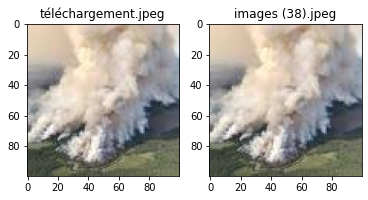

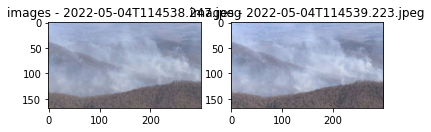

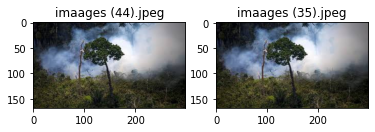

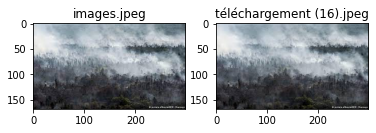

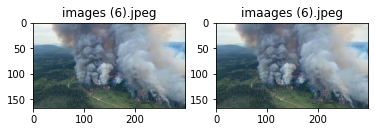

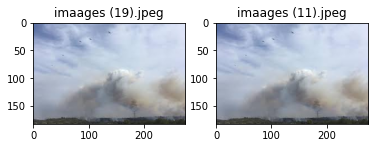

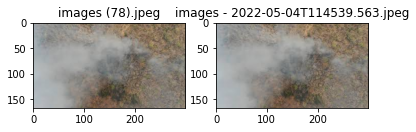

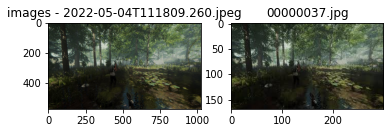

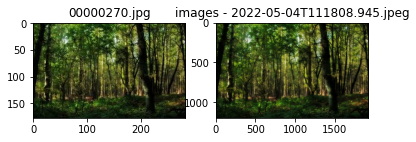

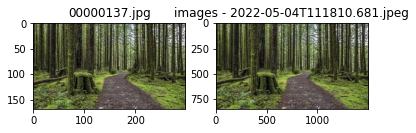

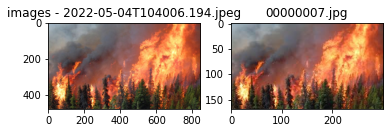

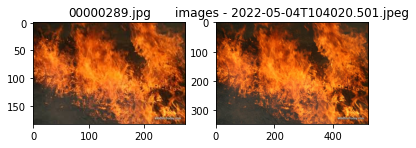

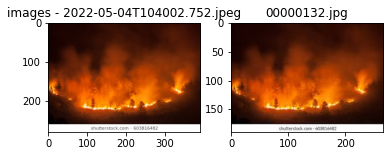

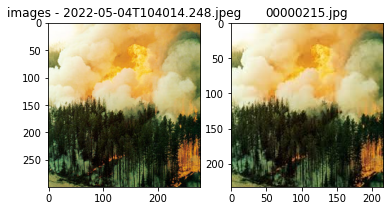

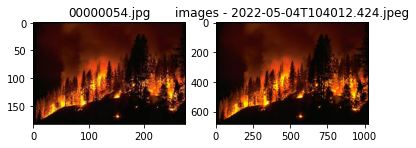

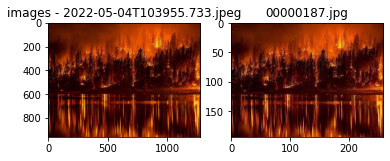

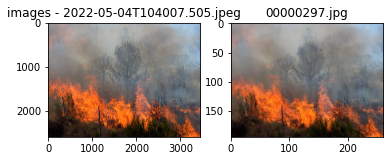

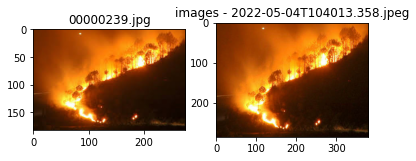

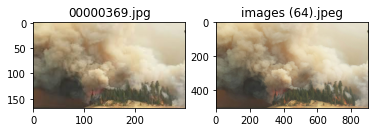

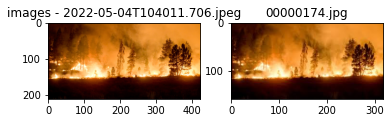

In [44]:
d3, p3 = analyse_dataset("/content/bases/FIRE_DATABASE_3", affichage=True)

# **5. Visualisation des données**

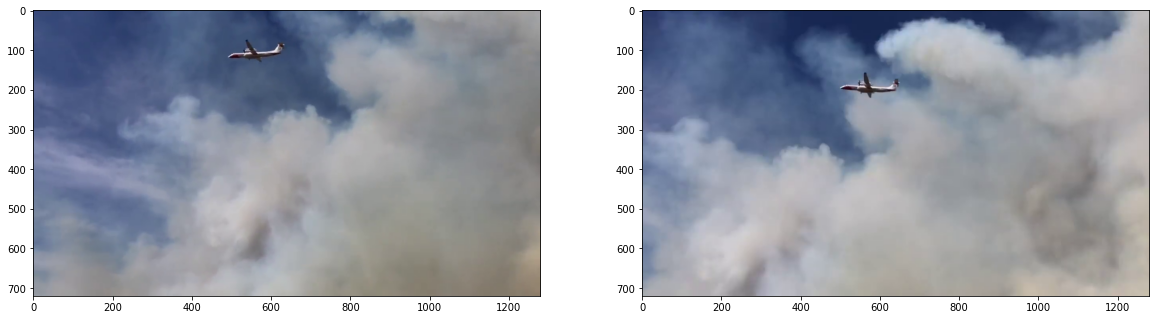

In [81]:
# Exemple de 2 images très semblables mais pas similaires
img1 = read_image("/content/bases/big/start_fire/SaintCana (321).png")
img2 = read_image("/content/bases/big/start_fire/SaintCana (320).png")
f, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(img1)
axarr[1].imshow(img2)

In [ ]:
# Analyse des images dans un directory: 
# -> permet d'identifier les problèmes dans le dataset (images aberrantes / présence de doublons)
directory = '/content/bases/small/fire'

for index, img in enumerate(os.listdir(directory)):
  img = os.path.join(os.getcwd(), directory, img)
  fig = plt.figure()
  image = read_image(img)
  plt.imshow(image)
  plt.title(img)

# **6. Création des jeux de données**

In [48]:
# Merge tous les jeux de données en 1 seul
if not os.path.exists("db1"):
  os.makedirs("db1/fire/")
  os.makedirs("db1/no_fire/")
  os.makedirs("db1/start_fire/")
!cp -a /content/bases/FIRE_DATABASE_1/no_fire/. /content/db1/no_fire/
!cp -a /content/bases/FIRE_DATABASE_2/no_fire/. /content/db1/no_fire/
!cp -a /content/bases/FIRE_DATABASE_3/no_fire/. /content/db1/no_fire/
!cp -a /content/bases/medium/no_fire/. /content/db1/no_fire/
!cp -a /content/bases/small/no_fire/. /content/db1/no_fire/
!cp -a /content/bases/big/no_fire/. /content/db1/no_fire/
!cp -a /content/bases/FIRE_DATABASE_1/start_fire/. /content/db1/start_fire/
!cp -a /content/bases/FIRE_DATABASE_2/start_fire/. /content/db1/start_fire/
!cp -a /content/bases/FIRE_DATABASE_3/start_fire/. /content/db1/start_fire/
!cp -a /content/bases/medium/start_fire/. /content/db1/start_fire/
!cp -a /content/bases/small/start_fire/. /content/db1/start_fire/
!cp -a /content/bases/big/start_fire/. /content/db1/start_fire/
!cp -a /content/bases/FIRE_DATABASE_1/fire/. /content/db1/fire/
!cp -a /content/bases/FIRE_DATABASE_2/fire/. /content/db1/fire/
!cp -a /content/bases/FIRE_DATABASE_3/fire/. /content/db1/fire/
!cp -a /content/bases/medium/fire/. /content/db1/fire/
!cp -a /content/bases/small/fire/. /content/db1/fire/
!cp -a /content/bases/big/fire/. /content/db1/fire/

In [53]:
# Merge tous les jeux de données en 1 seul
if not os.path.exists("db2"):
  os.makedirs("db2/fire/")
  os.makedirs("db2/no_fire/")
  os.makedirs("db2/start_fire/")
!cp -a /content/bases/FIRE_DATABASE_1/no_fire/. /content/db2/no_fire/
!cp -a /content/bases/FIRE_DATABASE_2/no_fire/. /content/db2/no_fire/
!cp -a /content/bases/FIRE_DATABASE_3/no_fire/. /content/db2/no_fire/
!cp -a /content/bases/FIRE_DATABASE_1/start_fire/. /content/db2/start_fire/
!cp -a /content/bases/FIRE_DATABASE_2/start_fire/. /content/db2/start_fire/
!cp -a /content/bases/FIRE_DATABASE_3/start_fire/. /content/db2/start_fire/
!cp -a /content/bases/FIRE_DATABASE_1/fire/. /content/db2/fire/
!cp -a /content/bases/FIRE_DATABASE_2/fire/. /content/db2/fire/
!cp -a /content/bases/FIRE_DATABASE_3/fire/. /content/db2/fire/


In [51]:
print('Tous les jeux de données ensembles avant traitement')
print(f"Images feu : {len(os.listdir('/content/db1/fire'))}")
print(f"Images début de feu : {len(os.listdir('/content/db1/start_fire'))}")
print(f"Images pas de feu : {len(os.listdir('/content/db1/no_fire'))}")

Tous les jeux de données ensembles avant traitement
Images feu : 2841
Images début de feu : 2917
Images pas de feu : 2819


In [54]:
print('Fire_database 1 / 2 /3 ensembles avant traitement')
print(f"Images feu : {len(os.listdir('/content/db2/fire'))}")
print(f"Images début de feu : {len(os.listdir('/content/db2/start_fire'))}")
print(f"Images pas de feu : {len(os.listdir('/content/db2/no_fire'))}")

Fire_database 1 / 2 /3 ensembles avant traitement
Images feu : 1342
Images début de feu : 986
Images pas de feu : 970


# **7. Sauvegarder les 2 jeux de données sur un drive**

In [83]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cp -av "/content/db1/" "/content/gdrive/MyDrive/Challenge1/"
%cp -av "/content/db2/" "/content/gdrive/MyDrive/Challenge1/"

In [ ]:
%cp -av "/content/test_data/" "/content/gdrive/MyDrive/Challenge1/"